<a href="https://colab.research.google.com/github/CBTantan10/MIT504/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.arima.model import ARIMA
register_matplotlib_converters()


In [ ]:
df = pd.read_csv('shampoo_sales.csv')
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [ ]:
df['Month'] = pd.date_range(start='2000-01-01',periods=len(df), freq='M')
df.set_index('Month', inplace=True)

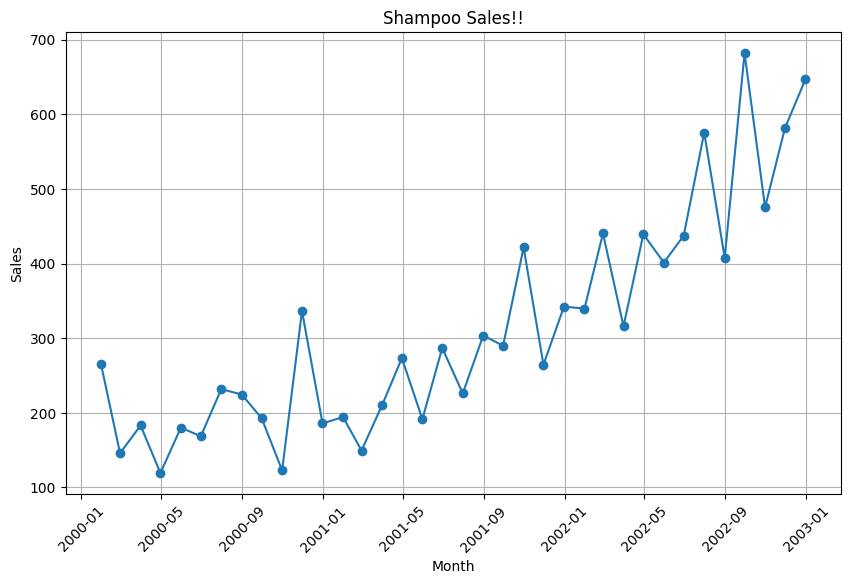

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Sales'], marker='o', linestyle='-')
plt.title('Shampoo Sales!!')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

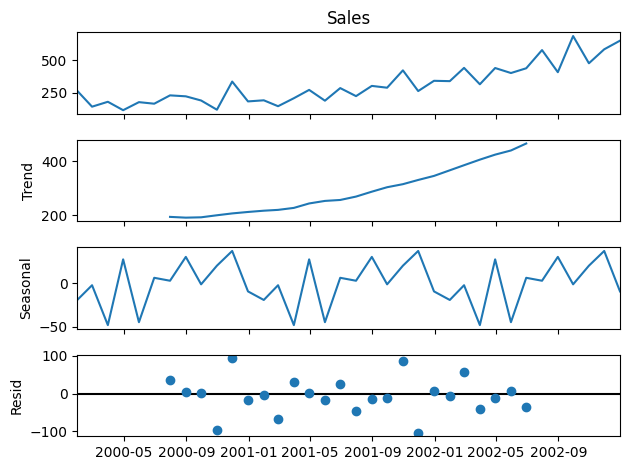

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Sales'], model='additive', period=12)

fig = decomposition.plot()
plt.show()

In [ ]:
model = ARIMA(df['Sales'], order=(5,1,0))
results = model.fit()

print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Sun, 21 Jul 2024   AIC                            408.969
Time:                        01:19:00   BIC                            418.301
Sample:                    01-31-2000   HQIC                           412.191
                         - 12-31-2002                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

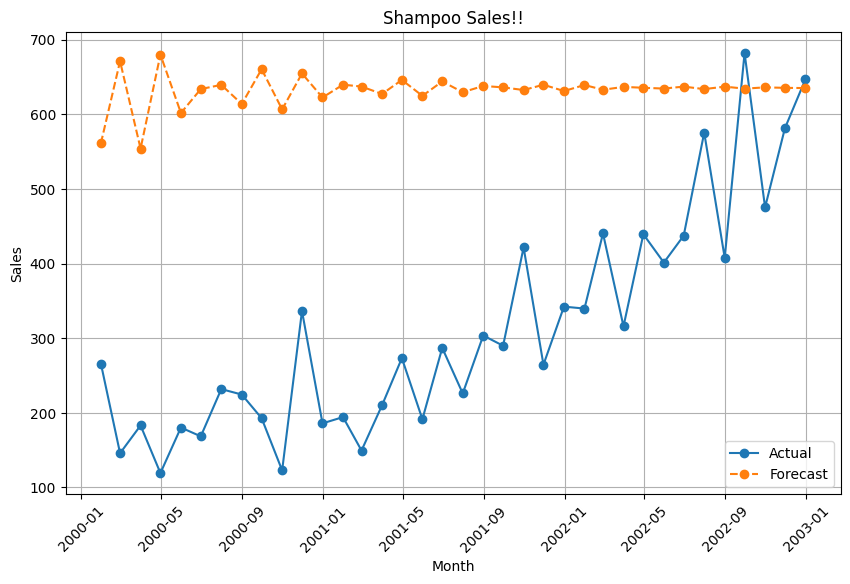

In [ ]:
forecast = results.forecast(steps=36)

plt.figure(figsize=(10,6))
plt.plot(df.index, df['Sales'], marker='o', linestyle='-', label='Actual')
plt.plot(df.index[-len(forecast):], forecast, marker='o', linestyle='--', label='Forecast')
plt.title('Shampoo Sales!!')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

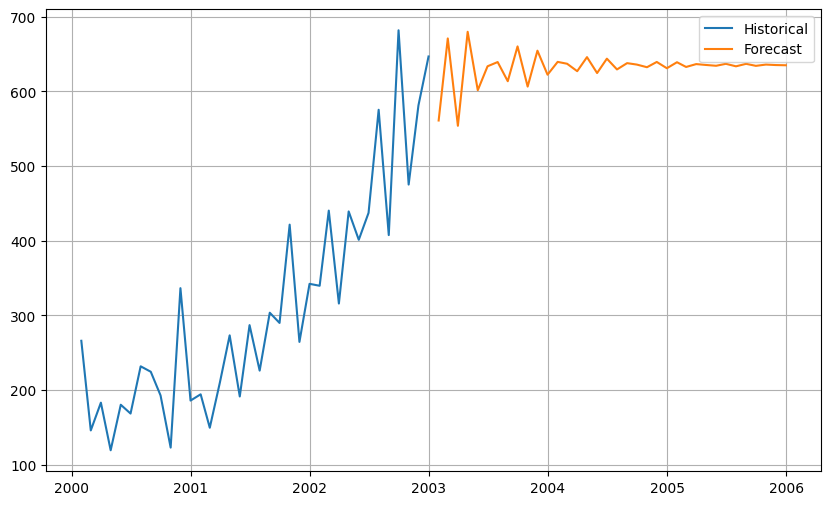

In [ ]:
forecast = results.forecast(steps=36)

plt.figure(figsize=(10, 6))
plt.plot(df.index,df['Sales'], label='Historical')
plt.plot(forecast.index, forecast, label='Forecast')
plt.grid(True)
plt.legend()
plt.show()